Degree: 1
Training MSE: 3.3815
Validation MSE (LOOCV): 5.0893
------------------------------
Degree: 2
Training MSE: 0.5880
Validation MSE (LOOCV): 1.1832
------------------------------
Degree: 3
Training MSE: 0.1111
Validation MSE (LOOCV): 0.2382
------------------------------
Degree: 4
Training MSE: 0.1092
Validation MSE (LOOCV): 0.3925
------------------------------
Degree: 5
Training MSE: 0.1029
Validation MSE (LOOCV): 0.5418
------------------------------
Degree: 6
Training MSE: 0.0973
Validation MSE (LOOCV): 2.3388
------------------------------
Degree: 7
Training MSE: 0.0703
Validation MSE (LOOCV): 0.8601
------------------------------
Degree: 8
Training MSE: 0.0641
Validation MSE (LOOCV): 7.2179
------------------------------


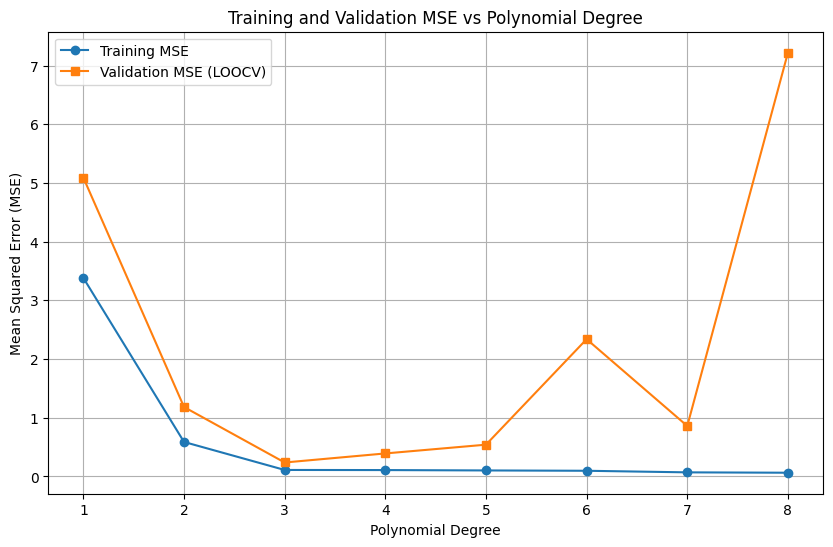

In [2]:
#Aakarsh Grandhi 191ADb1098. Machine Learning Assignment 1- Task 1.
# Importing the required libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt


# LOOCV function imported from Lecture 4_ModelEvaluation
def loocv(X, y, model):
    loo = LeaveOneOut()
    yHat = np.empty(y.size)  # This will be filled with predictions

    for train_idx, validation_idx in loo.split(X, y):  # #This will loop through the all folds
        X_train = X[train_idx]  # Data Splits into two different parts of Training Datasets
        y_train = y[train_idx]
        X_validation = X[validation_idx] # Data Splits into two different parts of Validation Datasets
        y_validation = y[validation_idx]
        model.fit(X_train, y_train)  # Analysing the prediction on the validation data point
        yHat[validation_idx] = model.predict(X_validation)

    MSE = mean_squared_error(y, yHat)
    R2 = r2_score(y, yHat)

    return MSE, R2

# Given data info from lecture Notes 4.Model Evaluation
X = np.array([-3.00, -2.54, -2.08, -1.62, -1.15, -0.69, -0.23,  0.23,  0.69,
              1.15,  1.62,  2.08,  2.54,  3.00]).reshape(14, 1)
y = np.array([ 2.60,  2.81,  3.49,  4.08,  3.30,  3.43,  4.59,  4.65,
               4.79,  6.45,  7.58,  9.78, 12.98, 15.49]).reshape(14, 1)


degrees = list(range(1, 9)) # This for loop will Loop over degrees 1 to 8 via Lists
training_mse_list = []
validation_mse_list = []

# Loop over degrees 1 to 8
for degree in degrees:
    poly = PolynomialFeatures(degree) # Focusing on transforming the features to polynomial features
    X_poly = poly.fit_transform(X)
    model = LinearRegression() #Fitting the required linear regresssion model onto our dataset
    model.fit(X_poly, y)

    # Compute training MSE
    y_pred = model.predict(X_poly)
    training_mse = mean_squared_error(y, y_pred)
    training_mse_list.append(training_mse)

    # Compute validation MSE using LOOCV
    validation_mse, _ = loocv(X_poly, y, LinearRegression())
    validation_mse_list.append(validation_mse)

    print(f"Degree: {degree}")     #Obtained Results are as follows for Task 1"
    print(f"Training MSE: {training_mse:.4f}")
    print(f"Validation MSE (LOOCV): {validation_mse:.4f}")
    print("-" * 30)

# Plotting the graphs for First task and second task analysis with Legends
plt.figure(figsize=(10,6))
plt.plot(degrees, training_mse_list, marker='o', label='Training MSE')
plt.plot(degrees, validation_mse_list, marker='s', label='Validation MSE (LOOCV)')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE vs Polynomial Degree')
plt.legend()
plt.xticks(degrees)
plt.grid(True)
plt.show()


In [5]:
#Task 2 - Explanation
#Here we see two curves for MSE for training and Validation MSE using LooCV function:

#(1) MSE for training: This is the mean square error of training with polynomial models up to degrees 1–8.
#(2) Validation MSE (LOOCV): This is the MSE calculated using Leave-One-Out Cross-Validation (LOOCV), which simply evaluates the model by training on all but one point and running the LOOCV on the left-out data point over all the points.
# Key Observations from the author are as follows:
#Training MSE Curve-  For the MSE of training shrinks with the polynomial increases. This is expected because higher-degree polynomials tend to overfit the data (in the process). At polynomial degrees 3 and higher, the MSE of the training set is almost 0 which means that the model is fitting the training data very well or even forgetting the data (overfitting).
#Checking the LOOCV validation MSE Curve -Validation MSE decreases early (from degrees 1 to 3), proving better model performances with unseen data as the polynomial complexity increases. Once we hit degree 3, the validation MSE begins escalating again in degrees 6 and 8, which indicates that the model is overfitting the training data and generalizing inaccurately on unseen data. At Degree 8- We get the extreme peak in validation MSE, which means overfitting.

#Conclusions:
#The Bias-Variance Tradeoff is observed and noted as follows - When it comes to lower-degree polynomials (e.g., degree 1), the model is extremely biased since it is very simple to model the data complexity. This shows itself in relatively high training and validation MSE. As we make more polynomial degree, the training MSE gets lower very fast and validation MSE gets up again after some time. The reason for this is the model begins to overfit the training set, and thus undergeneralize the new set (higher validation MSE).
#And for the Optimal Polynomial Degree it is observed and noted as follows - According to the plot, degree 3 appears to have the optimal compromise between fitting the training data properly and not overfitting. Here’s where the validation MSE falls short.  Above degree 3 you end up with overfitting (which basically fits training but cannot generalize as we can observe the validation MSE goes up by exponential amount).

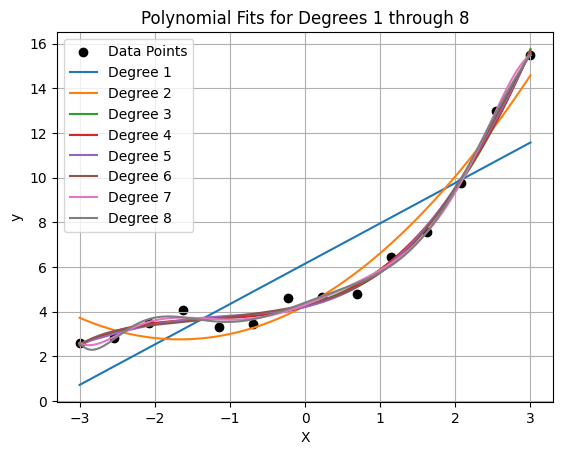

In [10]:
#AakarshGrandhi 191ADB108 Task 3
#Importing Required Libraries for Assignment such as numpy, matplotlib for plotting, sklearn for ML- LinearRegression etc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([-3.00, -2.54, -2.08, -1.62, -1.15, -0.69, -0.23,  0.23,  0.69,
              1.15,  1.62,  2.08,  2.54,  3.00]).reshape(-1, 1)
y = np.array([ 2.60,  2.81,  3.49,  4.08,  3.30,  3.43,  4.59,  4.65,
               4.79,  6.45,  7.58,  9.78, 12.98, 15.49]).reshape(-1, 1) # Given data from the Assignment 1 data info

X_smooth = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Compute a uniform range of X values to draw curves.
plt.scatter(X, y, color='black', label='Data Points') # Now plotting the actual data points

for degree in range(1, 9):
# Looping through the given specified degrees of 1 to 8 to plot the polynomial curves
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    X_smooth_poly = poly.transform(X_smooth)  # Generating polynomial predictions on smooth of X range
    y_smooth = model.predict(X_smooth_poly)

    plt.plot(X_smooth, y_smooth, label=f'Degree {degree}')  # Now Focusing on plotting each of the polynomial curve


plt.xlabel('X') # Adding the Final labels and legends
plt.ylabel('y')
plt.title('Polynomial Fits for Degrees 1 through 8')
plt.legend()
plt.grid(True)
plt.show() #Display the Final Plot
